# Project 1: Predicting Gallstone Disease from Clinical + Bioimpedance

Importing all the necessary libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression



 ## Phase 1: Data Loading & Initial Exploration
- [x] Check basic dataset info (shape, columns, data types)
- [x] Verify target variable encoding (0=Yes gallstones, 1=No gallstones)
- [x] Check for missing values
- [x] Examine basic statistics (describe())


In [ ]:
# Load the data from Excel file (might need to change the file name to: dataset-uci.xlsx)
data = pd.read_excel("mydata.xlsx")

# Basic info
print("Dataset shape (rows, columns): ", data.shape)

# Check data types
print("Data Types: ", data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Get column types and non-null counts
data.info()

# Quick numeric summary (mean, std, min, max, etc.)
data.describe()

Dataset shape (rows, columns):  (319, 39)
Data Types:  Gallstone Status                                    int64
Age                                                 int64
Gender                                              int64
Comorbidity                                         int64
Coronary Artery Disease (CAD)                       int64
Hypothyroidism                                      int64
Hyperlipidemia                                      int64
Diabetes Mellitus (DM)                              int64
Height                                              int64
Weight                                            float64
Body Mass Index (BMI)                             float64
Total Body Water (TBW)                            float64
Extracellular Water (ECW)                         float64
Intracellular Water (ICW)                         float64
Extracellular Fluid/Total Body Water (ECF/TBW)    float64
Total Body Fat Ratio (TBFR) (%)                   float64
Lean Mass (LM) (%

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


## Phase 2: Exploratory Data Analysis (EDA)
- [x] Analyze target variable distribution
- [x] Explore relationships between top features (Vitamin D, CRP, TBW, Lean Mass) and gallstone status (read about this in the paper)
- [x] Create correlation matrix/heatmap
- [x] Visualize feature distributions by gallstone status

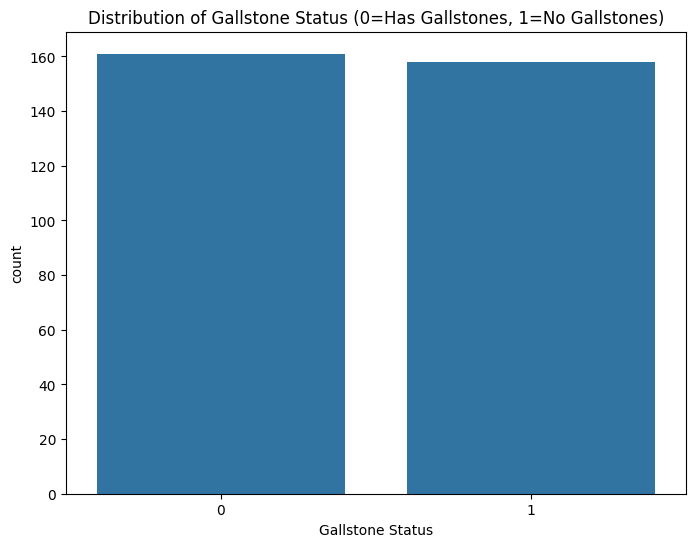

Gallstone Status Percentage:
Gallstone Status
0    50.47
1    49.53
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gallstone Status', data=data)
plt.title('Distribution of Gallstone Status (0=Has Gallstones, 1=No Gallstones)')
plt.show()

# Percentage breakdown
print("Gallstone Status Percentage:")
print((data['Gallstone Status'].value_counts(normalize=True) * 100).round(2))

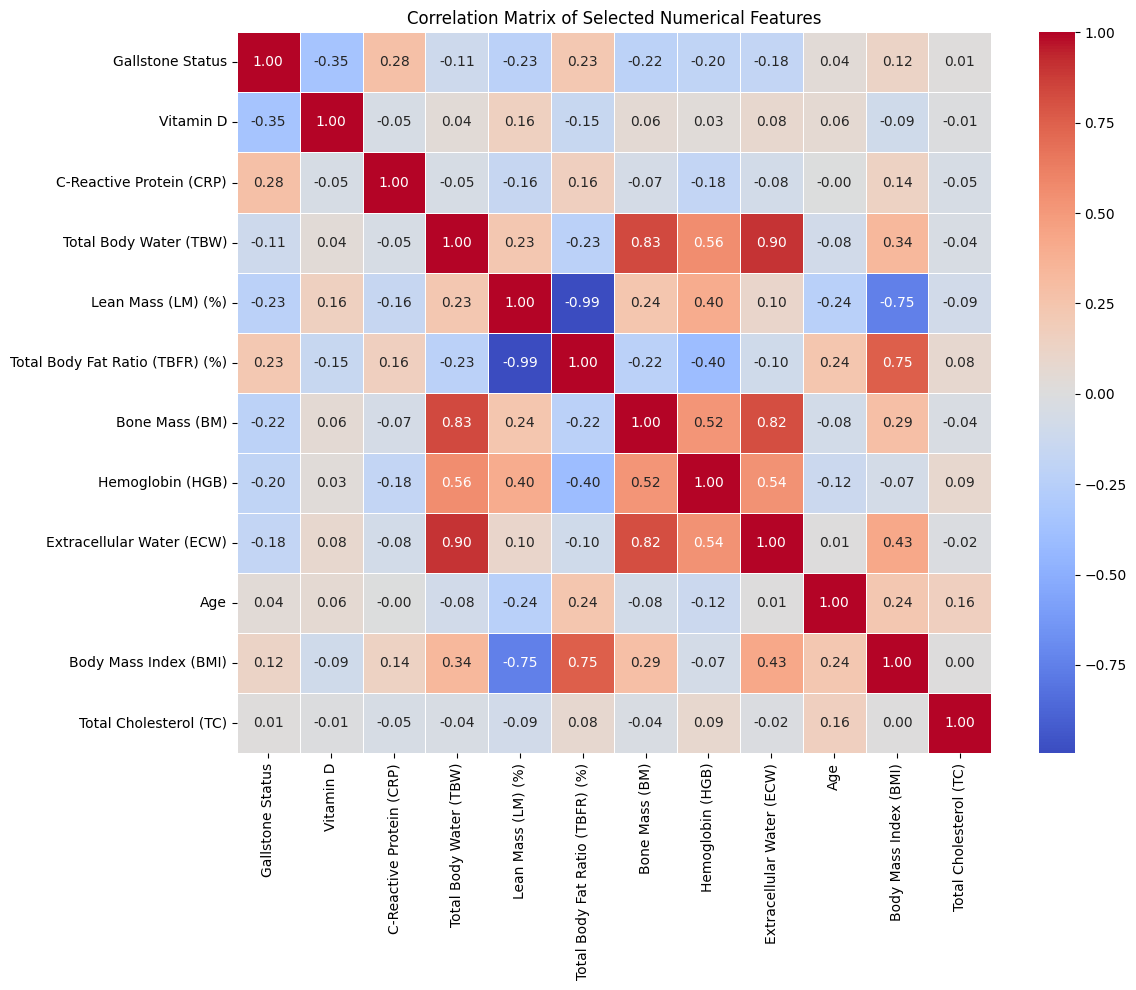

In [ ]:

selected_numerical_features =[
        'Gallstone Status',  # our target
    'Vitamin D',         
    'C-Reactive Protein (CRP)',   
    'Total Body Water (TBW)',    
    'Lean Mass (LM) (%)',        
    'Total Body Fat Ratio (TBFR) (%)',  
    'Bone Mass (BM)',            
    'Hemoglobin (HGB)',         
    'Extracellular Water (ECW)', 
    'Age',                      
    "Body Mass Index (BMI)", "Total Cholesterol (TC)"
] #  Can add more if needed

# Filter the dataframe to include only your selected numerical features
selected_data = data[selected_numerical_features]

# Create correlation matrix for selected features only
plt.figure(figsize=(12, 10))
correlation_matrix = selected_data.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Numerical Features')
plt.tight_layout()
plt.show()

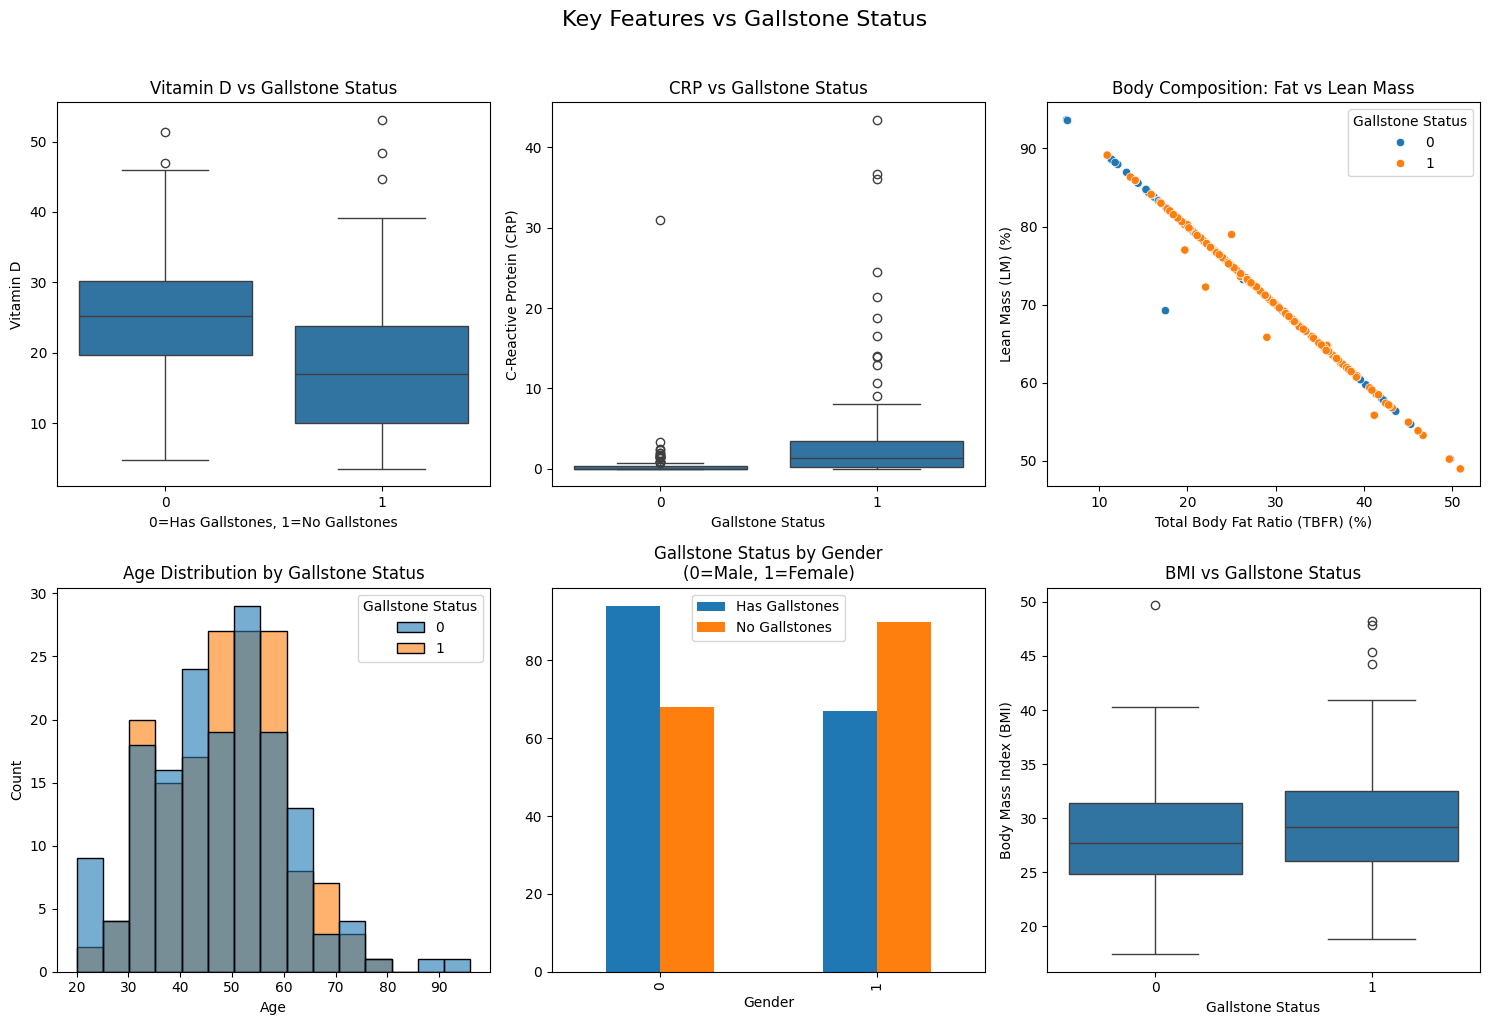

In [10]:
# Create subplots for the top features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Key Features vs Gallstone Status', fontsize=16, y=1.02)

# 1. Vitamin D (strongest predictor)
sns.boxplot(x='Gallstone Status', y='Vitamin D', data=data, ax=axes[0,0])
axes[0,0].set_title('Vitamin D vs Gallstone Status')
axes[0,0].set_xlabel('0=Has Gallstones, 1=No Gallstones')

# 2. CRP
sns.boxplot(x='Gallstone Status', y='C-Reactive Protein (CRP)', data=data, ax=axes[0,1])
axes[0,1].set_title('CRP vs Gallstone Status')

# 3. Lean Mass vs Body Fat Ratio (they're complementary)
sns.scatterplot(x='Total Body Fat Ratio (TBFR) (%)', y='Lean Mass (LM) (%)', 
                hue='Gallstone Status', data=data, ax=axes[0,2])
axes[0,2].set_title('Body Composition: Fat vs Lean Mass')

# 4. Age distribution by gallstone status
sns.histplot(data=data, x='Age', hue='Gallstone Status', multiple="layer", 
             alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Gallstone Status')

# 5. Gender analysis
gender_gallstone = pd.crosstab(data['Gender'], data['Gallstone Status'])
gender_gallstone.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Gallstone Status by Gender\n(0=Male, 1=Female)')
axes[1,1].legend(['Has Gallstones', 'No Gallstones'])

# 6. BMI vs Gallstone Status
sns.boxplot(x='Gallstone Status', y='Body Mass Index (BMI)', data=data, ax=axes[1,2])
axes[1,2].set_title('BMI vs Gallstone Status')

plt.tight_layout()
plt.show()

# AI models
  - [x] Logistic Regression (LR)
  - [x] Random Forest (RF)
  

## Logistic Regression


In [11]:
X = data.drop(['Gallstone Status'], axis=1)  # All features
y = data['Gallstone Status']
# 2. Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Feature count: {X_train.shape[1]}")
print(f"Class distribution in training: {y_train.value_counts().to_dict()}")

Data split completed:
Training set: 223 samples
Test set: 96 samples
Feature count: 38
Class distribution in training: {0: 113, 1: 110}


In [16]:
# Scale continuous variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
# Evaluate
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.78125
ROC-AUC: 0.8841145833333333

Confusion Matrix:
 [[39  9]
 [12 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        48
           1       0.80      0.75      0.77        48

    accuracy                           0.78        96
   macro avg       0.78      0.78      0.78        96
weighted avg       0.78      0.78      0.78        96



In [22]:
import numpy as np

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Odds Ratio', ascending=False)

print(coef_df)

                                           Feature  Coefficient  Odds Ratio
35                        C-Reactive Protein (CRP)     1.228135    3.414855
12                       Intracellular Water (ICW)     0.921428    2.512877
5                                   Hyperlipidemia     0.839782    2.315862
0                                              Age     0.746214    2.108999
14                 Total Body Fat Ratio (TBFR) (%)     0.685705    1.985172
28                  High Density Lipoprotein (HDL)     0.604319    1.830006
6                           Diabetes Mellitus (DM)     0.535283    1.707931
34                Glomerular Filtration Rate (GFR)     0.437582    1.548957
8                                           Weight     0.423367    1.527094
7                                           Height     0.324557    1.383418
31                    Alanin Aminotransferaz (ALT)     0.299444    1.349109
24                  Hepatic Fat Accumulation (HFA)     0.284667    1.329320
10          

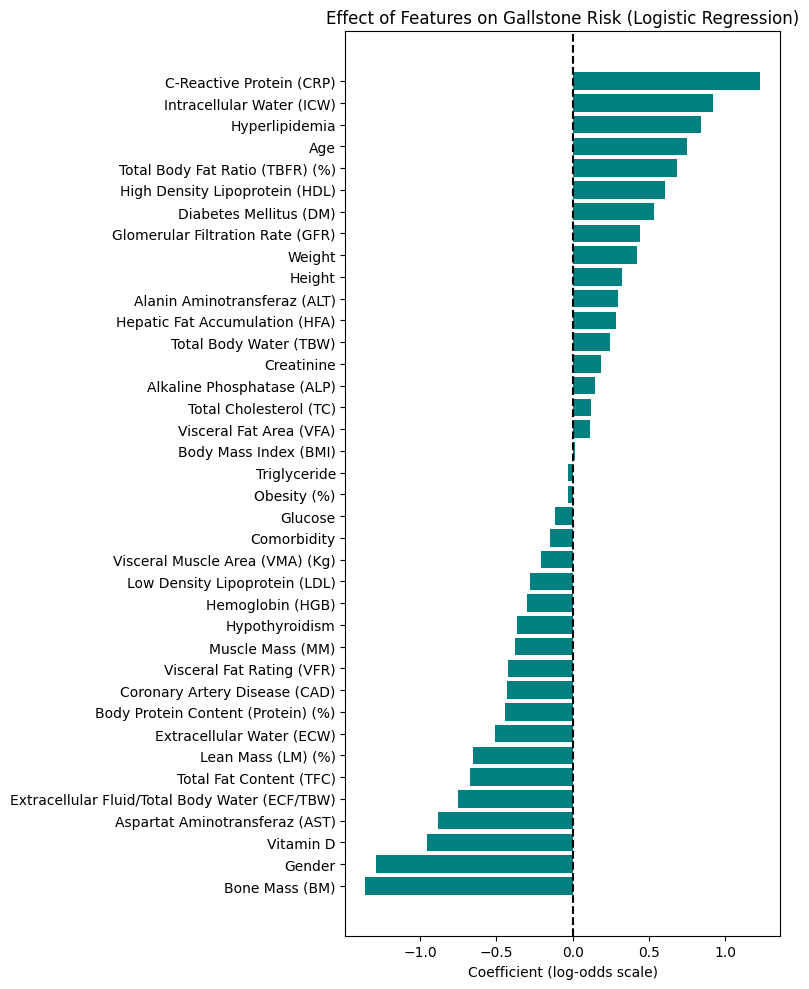

In [23]:
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8,10))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='teal')
plt.axvline(0, color='black', linestyle='--')
plt.title("Effect of Features on Gallstone Risk (Logistic Regression)")
plt.xlabel("Coefficient (log-odds scale)")
plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,     # number of trees (200)
    max_depth=None,       
    random_state=42,
    class_weight='balanced'   # handles any slight class imbalance
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.78125
ROC-AUC: 0.8925781249999999

Confusion Matrix:
 [[37 11]
 [10 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        48
           1       0.78      0.79      0.78        48

    accuracy                           0.78        96
   macro avg       0.78      0.78      0.78        96
weighted avg       0.78      0.78      0.78        96



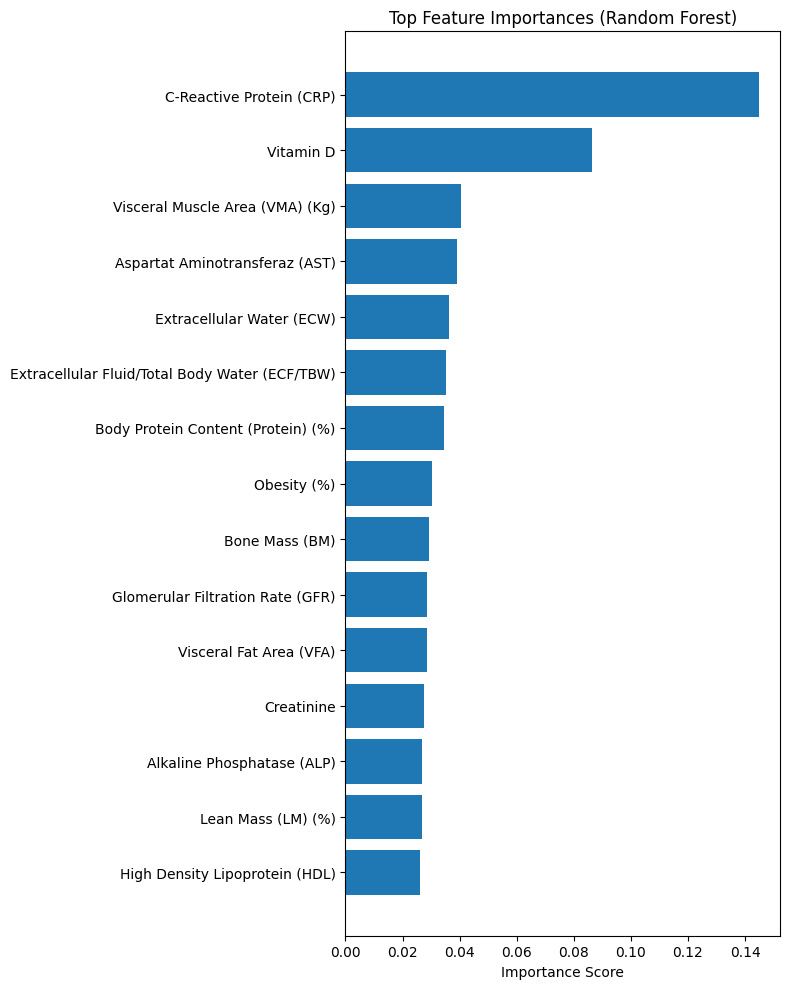

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,10))
plt.barh(importances.index[-15:], importances.values[-15:])  # top 15
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()